In [1]:
!pip install fuzzywuzzy
import pandas as pd
from pandas.io.json import json_normalize
import requests
import json
import os
from fuzzywuzzy import process, fuzz

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Kitchener data

In [0]:
import requests
response2010 = requests.get("https://opendata.arcgis.com/datasets/a47ef9f046d442808c306dfd59ec2f7c_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1998 = requests.get("https://opendata.arcgis.com/datasets/d056d3e23558481bbd99376e1718d0a3_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1997 = requests.get("https://opendata.arcgis.com/datasets/fcfa7d6ada794969bbed357e4bd85294_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1996 = requests.get("https://opendata.arcgis.com/datasets/76f77c2b2d864689bc0fc9adfbf690f7_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1995 = requests.get("https://opendata.arcgis.com/datasets/f362b8c4652d49d6bbb7a59478132caf_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1992 = requests.get("https://opendata.arcgis.com/datasets/a59f7b37fcc540438a63b36035ca0068_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2003 = requests.get("https://opendata.arcgis.com/datasets/02223f9066294cadb1737234d5ccc5ab_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2004 = requests.get("https://opendata.arcgis.com/datasets/78ab0cb401c349fa95c16b83d7e5d194_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2005 = requests.get("https://opendata.arcgis.com/datasets/bde5696c88654b6d84ae5ad7f6c910b6_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1993 = requests.get("https://opendata.arcgis.com/datasets/5f3c2930f4e4459ea66c6765a1b3bd88_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2000 = requests.get("https://opendata.arcgis.com/datasets/f218c27832da4fa083eb7b7c7dc1afec_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2002 = requests.get("https://opendata.arcgis.com/datasets/39f6b9d302354b2bbe044220c10621fd_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2007 = requests.get("https://opendata.arcgis.com/datasets/ad3e9afade7a4542839c562adfaff15e_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2008 = requests.get("https://opendata.arcgis.com/datasets/ebdd6808d748465689e343427cd8bf2f_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2006 = requests.get("https://opendata.arcgis.com/datasets/6b85448141bd4186850540e49189ce9d_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1994 = requests.get("https://opendata.arcgis.com/datasets/8c7ecc63062f470ab0793159cd7fbd8b_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1999 = requests.get("https://opendata.arcgis.com/datasets/a89b670d719a4d77a9190db4c456be3e_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2001 = requests.get("https://opendata.arcgis.com/datasets/a5f9ee5558e94e8fb6db498c1a318863_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2011 = requests.get("https://opendata.arcgis.com/datasets/d20e0fe797ac49f2b5033f81f754763d_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2012 = requests.get("https://opendata.arcgis.com/datasets/19105a10a66043a0802094650964935d_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2013 = requests.get("https://opendata.arcgis.com/datasets/66e434b25b234814831bd46baf9b7619_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2014 = requests.get("https://opendata.arcgis.com/datasets/dcd52c58025d4e6dbd6c188362f4322d_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2015 = requests.get("https://opendata.arcgis.com/datasets/c4327fc9ba164100a806bc9244b73908_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2016 = requests.get("https://opendata.arcgis.com/datasets/31937f8462c347188bb06796f73442df_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2009 = requests.get("https://opendata.arcgis.com/datasets/f2ab29afe873498f824492d114f80dc7_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
responses = [response1993, response1994, response1995, response1996, response1997, response1998, response1999, response2000, response2001, response2002, response2003, response2004, response2005, response2006, response2007, 
             response2008, response2009, response2010, response2011, response2012, response2013, response2014, response2015, response2016]

In [0]:
colnames = ['Decision', 'OBJECTID', 'Request_Number', 'Request_Type', 'Source', 'Summary_of_Request']
all_df = pd.DataFrame(columns=colnames)
# in 2014, some of the columns had an extra ':' afterward, so fix the column headings here
for response in responses:
    data = response.json()
    df = json_normalize(data["features"])
    df.columns = colnames
    #all_df = all_df.append(df, sort=True)
    all_df = all_df.append(df)
kw_df = all_df

### Toronto data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
!ls "/content/drive/My Drive/foi-kw"

article_figures				Scott_FOI_medium.ipynb
colab					SL_multilabel_classification.ipynb
FOI_Toronto.ipynb			Toronto_data
Glossary_of_Short_Forms_March_2018.doc	train.csv
Scott_FOI.ipynb				train.csv.zip


In [0]:
# just keep these columns
tor_colnames = ['Request_Number', 'Request_Type', 'Source', 'Summary', 'Disposition', 'Name']
tor_df = pd.DataFrame(columns=tor_colnames)
for file in os.listdir("/content/drive/My Drive/foi-kw/Toronto_data/requests"):
    if file.endswith(".xlsx") or file.endswith(".xls"):
        #print(file)
        tor_data = pd.read_excel("/content/drive/My Drive/foi-kw/Toronto_data/requests/"+file, header=0)
        #print(tor_df.columns)
        tor_df = pd.concat([tor_df,tor_data], axis=0, ignore_index=True, join_axes=[tor_df.columns])
        #print(tor_df.head())
# Talk about use of join_axes here. Had thought of going the fuzzywuzzy route, but the most important column, the decision, 
# was named either 'Disposition' or 'Name' which would not have been caught by the algorithm.

In [11]:
print(tor_df.columns)
print(tor_df.head())
print(tor_df.isnull().sum())

Index(['Request_Number', 'Request_Type', 'Source', 'Summary', 'Disposition',
       'Name'],
      dtype='object')
  Request_Number     Request_Type    Source  \
0  AG-2011-00001  General Records    Public   
1  AG-2011-00002  General Records    Public   
2  AG-2011-00003  General Records    Public   
3  AG-2011-00005  General Records  Business   
4  AG-2011-00006  General Records  Business   

                                             Summary  \
0  A copy of the dog attack report with respect t...   
1  A copy of all complaints, inspections, violati...   
2  A copy of the building file for [a specified a...   
3  A copy of the fire report for [a specified add...   
4  A copy of the fire report for [a specified add...   

                           Disposition Name  
0  Disclosed in Part: Partially Exempt  NaN  
1  Disclosed in Part: Partially Exempt  NaN  
2                        All Disclosed  NaN  
3  Disclosed in Part: Partially Exempt  NaN  
4  Disclosed in Part: Partially Exe

In [12]:
# Now let's fill all of the empty 'Disposition' spots with the Name as these columns are either/or
tor_df['Disposition'] = tor_df['Disposition'].fillna(tor_df['Name'])
tor_df.isnull().sum()

Request_Number     274
Request_Type       585
Source             585
Summary              0
Disposition         25
Name              6226
dtype: int64

In [13]:
tor_df = tor_df.drop(['Name'], axis=1)
# Now rename the 'Disposition' and 'Summary' columns so that they match what we have from KW
tor_df.columns = ['Request_Number', 'Request_Type', 'Source', 'Summary_of_Request', 'Decision']
print(tor_df.columns)

Index(['Request_Number', 'Request_Type', 'Source', 'Summary_of_Request',
       'Decision'],
      dtype='object')


In [14]:
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10699 entries, 0 to 10698
Data columns (total 5 columns):
Request_Number        10425 non-null object
Request_Type          10114 non-null object
Source                10114 non-null object
Summary_of_Request    10699 non-null object
Decision              10674 non-null object
dtypes: object(5)
memory usage: 418.0+ KB


In [0]:
# Now let's see if we can combine with KW data
all_df = pd.concat([kw_df, tor_df], axis=0, ignore_index=True, join_axes=[tor_df.columns])

In [17]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11521 entries, 0 to 11520
Data columns (total 5 columns):
Request_Number        11247 non-null object
Request_Type          10936 non-null object
Source                10936 non-null object
Summary_of_Request    11521 non-null object
Decision              11496 non-null object
dtypes: object(5)
memory usage: 450.1+ KB


In [18]:
print(all_df['Decision'].value_counts())
print(len(all_df['Decision'].unique()))

Disclosed in Part: Partially Exempt                6207
All Disclosed                                      2607
No Responsive Records Exist                         547
No Records Exist                                    395
Disclosed in Part: No Records Exist                 329
All disclosed                                       238
Partly exempted                                     197
Nothing Disclosed (exemption)                       181
Transferred Out in Full                             165
Abandoned/Withdrawn by Applicant                    139
Withdrawn                                           116
Nothing Disclosed (excluded)                         61
No records exist                                     54
Information disclosed in part                        50
Partly non-existent                                  32
Nothing disclosed                                    28
Nothing Disclosed                                    21
No record exists                                

### Combine these fields using fuzzywuzzy

In [0]:
all_df['Decision'] = all_df['Decision'].fillna("")

In [0]:
all_df_clean = all_df.copy()

In [0]:
for row in all_df['Decision'].unique():
    for row2 in all_df['Decision'].unique():
        matching_result = fuzz.ratio(row, row2) # could be ratio, partial_ratio, token_set_ratio, token_sort_ratio 
        if matching_result > 80:
            #print(row, row2)
            #print(matching_results)
            #Combine if match found
            all_df_clean['Decision'][all_df_clean['Decision'] == row2] = row

In [22]:
print(all_df_clean['Decision'].value_counts())
print(len(all_df_clean['Decision'].unique()))

Disclosed in part/ partly exempt                   6209
All Disclosed                                      2847
No Responsive Records Exist                         558
No Records Exist                                    470
Disclosed in Part: No Records Exist                 329
Nothing Disclosed (excluded)                        242
Partly exempted                                     197
Transferred Out in Full                             165
Abandoned/Withdrawn by Applicant                    139
Withdrawn                                           116
Information disclosed in part                        50
Nothing Disclosed                                    49
Partly non-existent                                  32
No information disclosed                             30
                                                     25
Abandoned After Fee Estimate                         16
Forwarded out                                        15
Abandoned                                       

### Compare with other fuzzywuzzy algorithms

In [0]:
all_df_pr = all_df.copy()

In [0]:
for row in all_df['Decision'].unique():
    for row2 in all_df['Decision'].unique():
        matching_result = fuzz.partial_ratio(row, row2) # could be ratio, partial_ratio, token_set_ratio, token_sort_ratio 
        if matching_result > 80:
            #print(row, row2)
            #print(matching_results)
            #Combine if match found
            all_df_pr['Decision'][all_df_pr['Decision'] == row2] = row

In [25]:
print(all_df_pr['Decision'].value_counts())
print(len(all_df_pr['Decision'].unique()))

 Disclosed in Part: Partially Exempt    6208
All Disclosed                           2847
No Responsive Records Exist             1358
Nothing Disclosed (exemption)            291
Request withdrawn                        256
Disclosed in part/ partly exempt         198
Transferred Out in Full                  168
No information disclosed                  80
Non-existent                              35
Abandoned/Withdrawn by Applicant          29
                                          25
Forwarded out                             15
Correction refused                         3
Correction made in part                    3
Not Applicable                             2
Correction granted                         1
Deemed Refusal                             1
Statement of disagreement filed            1
Name: Decision, dtype: int64
18


### 'Partial_ratio' seems to be closer to what we want, i.e. the 'abandoned/withdrawn' cases have been nicely combined

In [0]:
all_df_tsr = all_df.copy()

In [0]:
for row in all_df['Decision'].unique():
    for row2 in all_df['Decision'].unique():
        matching_result = fuzz.token_sort_ratio(row, row2) # could be ratio, partial_ratio, token_set_ratio, token_sort_ratio 
        if matching_result > 80:
            #print(row, row2)
            #print(matching_results)
            #Combine if match found
            all_df_tsr['Decision'][all_df_tsr['Decision'] == row2] = row

In [28]:
print(all_df_tsr['Decision'].value_counts())
print(len(all_df_tsr['Decision'].unique()))

Disclosed in part/ partly exempt                   6209
All Disclosed                                      2847
No Responsive Records Exist                         558
No Records Exist                                    470
Disclosed in Part: No Records Exist                 329
Partly exempted                                     197
Nothing Disclosed (exemption)                       181
Transferred Out in Full                             165
Abandoned/Withdrawn by Applicant                    139
Withdrawn                                           116
No information disclosed                             80
Nothing Disclosed (excluded)                         61
Nothing Disclosed                                    49
Partly non-existent                                  32
                                                     25
Abandoned After Fee Estimate                         16
Forwarded out                                        15
Abandoned                                       

### The same as 'partial_ratio'...

In [0]:
all_df_tokset = all_df.copy()

In [0]:
for row in all_df['Decision'].unique():
    for row2 in all_df['Decision'].unique():
        matching_result = fuzz.token_set_ratio(row, row2) # could be ratio, partial_ratio, token_set_ratio, token_sort_ratio 
        if matching_result > 80:
            #print(row, row2)
            #print(matching_results)
            #Combine if match found
            all_df_tokset['Decision'][all_df_tokset['Decision'] == row2] = row

In [31]:
print(all_df_tokset['Decision'].value_counts())
print(len(all_df_tokset['Decision'].unique()))

### We've trimmed a few more categories, but the 'All disclosed' branch has been lumped in with 'Nothing Disclosed (excluded)' which obviously won't do

Disclosed in Part: No Records Exist    10785
Request withdrawn                        256
Partly exempted                          197
Transferred Out in Full                  168
Non-existent                              35
Abandoned/Withdrawn by Applicant          29
                                          25
Forwarded out                             15
Correction made in part                    3
Correction refused                         3
Not Applicable                             2
Deemed Refusal                             1
Statement of disagreement filed            1
Correction granted                         1
Name: Decision, dtype: int64
14


### We've trimmed a few more categories, but the 'All disclosed' branch has been lumped in with 'Nothing Disclosed (excluded)' which obviously won't do. Let's use 'partial_ratio' going forward.

### Still need to combine some cases manually

In [0]:
all_df_pr['Decision'].loc[all_df_pr['Decision'] == "Non-existent"] = "No Records Exist"
all_df_pr['Decision'].loc[all_df_pr['Decision'] == "No information disclosed "] = "Nothing Disclosed"
all_df_pr['Decision'].loc[all_df_pr['Decision'] == "Disclosed in part/ partly exempt"] = " Disclosed in Part: Partially Exempt"

In [33]:
all_df_pr['Decision'].value_counts()

 Disclosed in Part: Partially Exempt    6406
All Disclosed                           2847
No Responsive Records Exist             1358
Nothing Disclosed (exemption)            291
Request withdrawn                        256
Transferred Out in Full                  168
Nothing Disclosed                         80
No Records Exist                          35
Abandoned/Withdrawn by Applicant          29
                                          25
Forwarded out                             15
Correction refused                         3
Correction made in part                    3
Not Applicable                             2
Statement of disagreement filed            1
Correction granted                         1
Deemed Refusal                             1
Name: Decision, dtype: int64

### Restrict to the top 6 decisions

In [34]:
all_df_top6 = all_df_pr.groupby('Decision').filter(lambda x: len(x) > 100)
print(all_df_top6['Decision'].value_counts())
categories = all_df_top6['Decision'].value_counts().index.tolist()

 Disclosed in Part: Partially Exempt    6406
All Disclosed                           2847
No Responsive Records Exist             1358
Nothing Disclosed (exemption)            291
Request withdrawn                        256
Transferred Out in Full                  168
Name: Decision, dtype: int64


In [35]:
# encode the target variable as an integer
all_df_top6['category_id'] = all_df_top6['Decision'].factorize()[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
category_id_df = all_df_top6[['Decision', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df.head()

,Decision,category_id
0,All Disclosed,0
2,Disclosed in Part: Partially Exempt,1
17,No Responsive Records Exist,2
26,Request withdrawn,3
152,Nothing Disclosed (exemption),4


In [0]:
### Don't need this right now
#category_to_id = dict(category_id_df.values)
#print(category_to_id)
#id_to_category = dict(category_id_df[['category_id', 'Decision']].values)
#print(id_to_category)

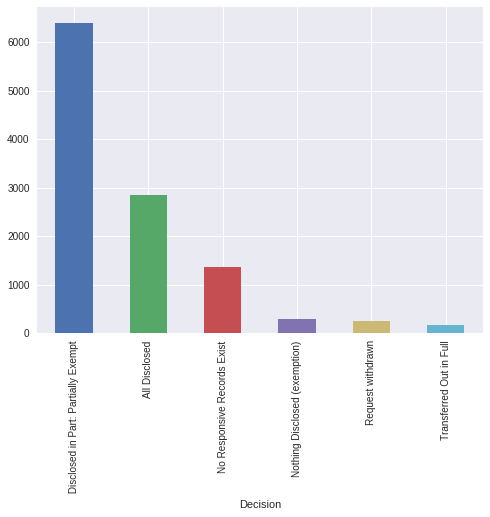

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
all_df_top6.groupby('Decision').Summary_of_Request.count().plot.bar(ylim=0)
plt.show()

In [0]:
# Here is where we might put in upsampling

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', 
                       encoding='latin-1', ngram_range=(1,2), stop_words='english')

features = tfidf.fit_transform(all_df_top6.Summary_of_Request).toarray()
labels = all_df_top6.category_id
features.shape

(11326, 6656)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

X_train, X_test, y_train, y_test = train_test_split(all_df_top6['Summary_of_Request'], all_df_top6['Decision'], test_size=0.33, random_state=42, shuffle=True)

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3,
                          random_state=0), #, class_weight='balanced'),
    LinearSVC(), #class_weight='balanced'),
    MultinomialNB(),
    LogisticRegression(random_state=0)#, class_weight='balanced'),
]
CV=5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries=[]
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels,
                                scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


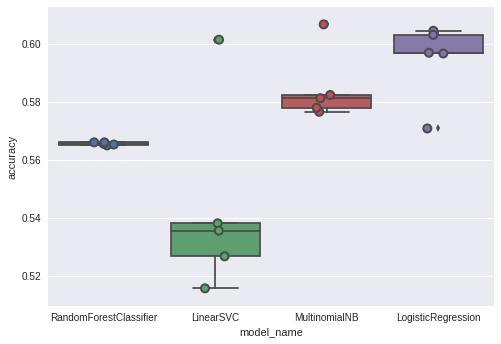

model_name
LinearSVC                 0.543521
LogisticRegression        0.594473
MultinomialNB             0.585023
RandomForestClassifier    0.565602
Name: accuracy, dtype: float64


In [42]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
             size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()
print(cv_df.groupby('model_name').accuracy.mean())

In [43]:
X_train.head()

4134    A copy of all e-mails sent and received on Jul...
3576    A copy of any records relating to the food ser...
337     Contracts and payments made by the Region of W...
5861    Copies of permits, applications drawings and s...
6196    A copy of spreadsheet detailing annual Parklan...
Name: Summary_of_Request, dtype: object

In [45]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
import spacy
from spacy.lang.en import English
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS
import string
parser = English()
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS)+ list(STOPWORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]

def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [0]:
y_train_dums = pd.get_dummies(y_train)
y_test_dums = pd.get_dummies(y_test)

In [48]:
from sklearn.metrics import accuracy_score

NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=tokenizeText, stop_words='english')),
                ('clf', OneVsRestClassifier(MultinomialNB())),
            ])

for decision in categories:
    print(decision)
    NB_pipeline.fit(X_train, y_train_dums[decision])
    prediction = NB_pipeline.predict(X_test)    
    print('Test accuracy is {}'.format(accuracy_score(y_test_dums[decision], prediction)))
    
# Is accuracy the  best metric here?
# Timeline before request is abandoned?
# Gensim topic modeling to compare KW and Toronto language

 Disclosed in Part: Partially Exempt


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Test accuracy is 0.6851257356875334
All Disclosed
Test accuracy is 0.7423756019261637
No Responsive Records Exist
Test accuracy is 0.8852327447833066
Nothing Disclosed (exemption)
Test accuracy is 0.9737827715355806
Request withdrawn
Test accuracy is 0.9794007490636704
Transferred Out in Full
Test accuracy is 0.985553772070626


In [49]:
LSVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=tokenizeText, stop_words='english')),
                ('clf', OneVsRestClassifier(LinearSVC())),
            ])

for decision in categories:
    print(decision)
    LSVC_pipeline.fit(X_train, y_train_dums[decision])
    prediction = LSVC_pipeline.predict(X_test)    
    print('Test accuracy is {}'.format(accuracy_score(y_test_dums[decision], prediction)))

 Disclosed in Part: Partially Exempt


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Test accuracy is 0.6883360085607276
All Disclosed
Test accuracy is 0.7421080791867308
No Responsive Records Exist
Test accuracy is 0.8855002675227395
Nothing Disclosed (exemption)
Test accuracy is 0.9740502942750133
Request withdrawn
Test accuracy is 0.9788657035848047
Transferred Out in Full
Test accuracy is 0.9876939539860888


In [50]:
LR_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=tokenizeText, stop_words='english')),
                ('clf', OneVsRestClassifier(LogisticRegression(random_state=0))),
            ])

for decision in categories:
    print(decision)
    LR_pipeline.fit(X_train, y_train_dums[decision])
    prediction = LR_pipeline.predict(X_test)    
    print('Test accuracy is {}'.format(accuracy_score(y_test_dums[decision], prediction)))

 Disclosed in Part: Partially Exempt


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test accuracy is 0.695024077046549
All Disclosed


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test accuracy is 0.7506688068485822
No Responsive Records Exist


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test accuracy is 0.8879079721776351
Nothing Disclosed (exemption)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test accuracy is 0.9737827715355806
Request withdrawn


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test accuracy is 0.9794007490636704
Transferred Out in Full


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test accuracy is 0.9858212948100589


In [51]:
RF_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=tokenizeText, stop_words='english')),
                ('clf', OneVsRestClassifier(RandomForestClassifier(n_estimators=200, max_depth=3,
                          random_state=0))),
            ])

for decision in categories:
    print(decision)
    RF_pipeline.fit(X_train, y_train_dums[decision])
    prediction = RF_pipeline.predict(X_test)    
    print('Test accuracy is {}'.format(accuracy_score(y_test_dums[decision], prediction)))

 Disclosed in Part: Partially Exempt


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Test accuracy is 0.5639379347244515
All Disclosed
Test accuracy is 0.7367576243980738
No Responsive Records Exist
Test accuracy is 0.8849652220438737
Nothing Disclosed (exemption)
Test accuracy is 0.9737827715355806
Request withdrawn
Test accuracy is 0.9794007490636704
Transferred Out in Full
Test accuracy is 0.985553772070626


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

knn_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=tokenizeText, stop_words='english')),
                ('clf', KNeighborsClassifier(n_neighbors=1)),
            ])

knn_pipeline.fit(X_train, y_train)

#plot_decision_regions(X_train.values, y_train.values, clf=knn)
# ROC curve

knn_pipeline.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


0.5497592295345104

In [53]:
from xgboost import XGBClassifier

xgb_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=tokenizeText, stop_words='english')),
                ('clf', XGBClassifier(silent=False, n_jobs=-1))
])

xgb_pipeline.fit(X_train, y_train)

xgb_pipeline.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


0.6142322097378277

### LSTM model

In [54]:
y_train.head()

4134     Disclosed in Part: Partially Exempt
3576     Disclosed in Part: Partially Exempt
337                            All Disclosed
5861     Disclosed in Part: Partially Exempt
6196                           All Disclosed
Name: Decision, dtype: object

In [55]:
import numpy as np

from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, LSTM, GRU, Flatten, Input, Bidirectional, GlobalMaxPooling1D, Dropout
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback

Using TensorFlow backend.


In [0]:
num_classes = 6
embedding_dim = 300
epochs = 50
batch_size = 128
max_len = 40

class_weights = {0: 2,
                1: 5,
                2: 1,
                3: 25,
                4: 17,
                5: 38}

#imbalanced_learn

In [0]:
# One hot encoding target
# sub in 'category_id' column here
def onehot(arr, num_class):
    return np.eye(np.max(arr) + 1)[np.array(arr.astype(int))]

new_y = onehot(all_df_top6['category_id'], num_classes)
#print(new_y.shape)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(all_df_top6['Summary_of_Request'], new_y, test_size = 0.05)

In [64]:
drive.mount('/content/drive')
!ls "/content/drive/My Drive/foi-kw"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
article_figures				Scott_FOI_medium.ipynb
colab					SL_multilabel_classification.ipynb
FOI_Toronto.ipynb			Toronto_data
Glossary_of_Short_Forms_March_2018.doc	train.csv
glove.6B.300d.txt			train.csv.zip
Scott_FOI.ipynb


In [0]:
embeddings_index = {}

# Download this file first
#f = open("/Users/sjones/Downloads/glove.840B.300d.txt", encoding="utf8")
f = open("/content/drive/My Drive/foi-kw/glove.6B.300d.txt", encoding="utf8")

for line in f:
    values = line.split()
    word = ''.join(values[:-embedding_dim])
    coefs = np.asarray(values[-embedding_dim:], dtype="float32")
    embeddings_index[word] = coefs
f.close()

tokenizer = Tokenizer(num_words = None)
tokenizer.fit_on_texts(X_train)

sequences_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(sequences_train, maxlen=max_len)

sequences_val = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(sequences_val, maxlen=max_len)

word_index = tokenizer.word_index

#create embedding layer
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
# Google Colaboratory for GPUs

In [66]:
input= Input(shape=(max_len, ), dtype = 'int32')
embedding_layer = Embedding(len(word_index) + 1, embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length=max_len, trainable=False)
embedded_sequences = embedding_layer(input)
x = Bidirectional(GRU(units=32, return_sequences=True))(embedded_sequences)
x = GlobalMaxPooling1D()(x)
x = Dense(50, activation = 'relu')(x)
x = Dropout(0.1)(x)
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=input, outputs=output)
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

#model = Sequential()
#model.add(embedding_layer)
#model.add(LSTM(units=32, dropout=0.2, recurrent_dropout=0.2))
#model.add(Dense(6, activation='softmax'))
#model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 40)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 40, 300)           3633900   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40, 64)            63936     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3250      
_________________________________________________________________
dropout_1 (Dropout)  

In [67]:
print(X_train.shape)
print(y_train.shape)

(10759, 40)
(10759, 6)


In [68]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), class_weight=class_weights)
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy: %f' % (accuracy*100))
model.reset_states()

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 10759 samples, validate on 567 samples
Epoch 1/50
10759/10759 [==============================] - 25s 2ms/step - loss: 6.5951 - acc: 0.5482 - val_loss: 1.3904 - val_acc: 0.5714
Epoch 2/50
10759/10759 [==============================] - 13s 1ms/step - loss: 5.5017 - acc: 0.5600 - val_loss: 1.3601 - val_acc: 0.5467
Epoch 3/50
10759/10759 [==============================] - 13s 1ms/step - loss: 4.9905 - acc: 0.5598 - val_loss: 1.3369 - val_acc: 0.5679
Epoch 4/50
10759/10759 [==============================] - 13s 1ms/step - loss: 4.5799 - acc: 0.5686 - val_loss: 1.2684 - val_acc: 0.5679
Epoch 5/50
10759/10759 [==============================] - 13s 1ms/step - loss: 4.2117 - acc: 0.5768 - val_loss: 1.3183 - val_acc: 0.5661
Epoch 6/50
10759/10759 [==============================] - 13s 1ms/step - loss: 3.9061 - acc: 0.5830 - val_loss: 1.2982 - val_acc: 0.5520
Epoc

Apply to test set

In [79]:
from sklearn.metrics import accuracy_score

# Predictions
pred_test = model.predict(X_test)
pred_test = [np.argmax(x) for x in pred_test]

# Actual
true_test = [np.argmax(x) for x in y_test]

# Find accuracies
accuracy = accuracy_score(true_test, pred_test)
print(accuracy)

0.5890652557319224


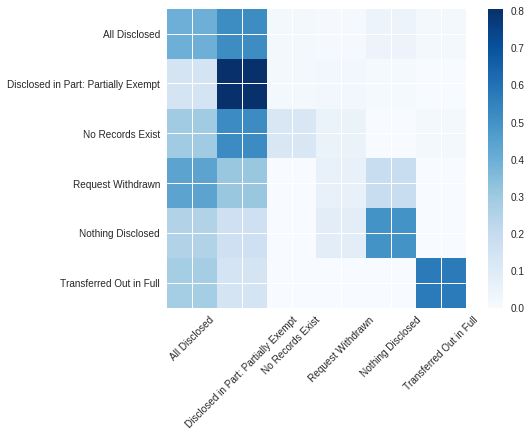

In [83]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_test, pred_test)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

class_name = ["All Disclosed", "Disclosed in Part: Partially Exempt", "No Records Exist", "Request Withdrawn", "Nothing Disclosed", 
             "Transferred Out in Full"]
plt.colorbar()
tick_marks = np.arange(len(class_name))
plt.xticks(tick_marks, class_name, rotation=45)
plt.yticks(tick_marks, class_name)

plt.show()